# Load The Dataset

In [1]:
import utils
import torch
from torch.utils.data import DataLoader,random_split
import torchvision
import model

import matplotlib.pyplot as plt

p = (0.001,0.01)
depth_sampling = lambda x: utils.sample_depth_random(x,p)

depth_transform = torchvision.transforms.Lambda(depth_sampling)
data = utils.NYUDepthV2("NYUDepthv2", 
                        shape=(240,320),
                        depth_transform=depth_transform,
                        )
loader = DataLoader(data,
                    batch_size=4,
                    shuffle=True,
                    num_workers=4,
                    pin_memory=True)

train_size = int(0.8*len(data))
test_size = len(data)-train_size

train_data, test_data = random_split(data,[train_size,test_size])

# Display one sample

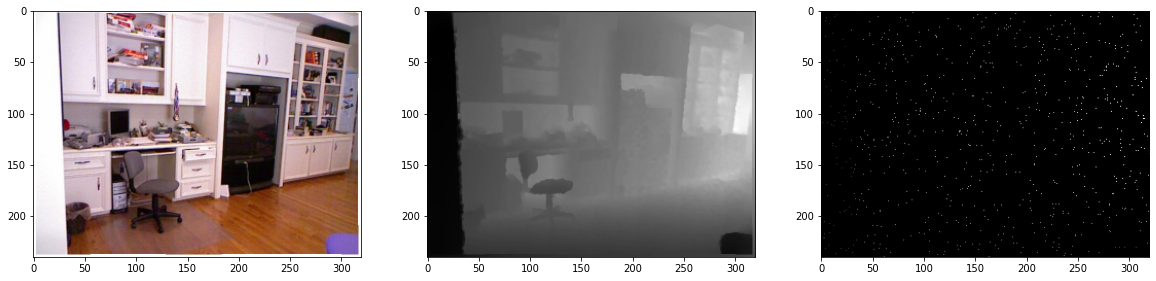

In [2]:
sample = data[int(torch.rand(1).item()*len(data))]

rgb = sample["rgb"]
depth = sample["depth"]
depth_t = sample["depth_t"]
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))

ax1.imshow(rgb.permute(1,2,0))
ax2.imshow(depth.permute(1,2,0),cmap="gray")
ax3.imshow(depth_t.permute(1,2,0),cmap="gray")

# Load The Model

In [3]:
from torch import optim

import model

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

device = torch.device("cpu")

net = model.Net1().to(device)

optimizer = optim.SGD(net.parameters(),lr=10**-3,momentum=0.9)

# scheduler = ...


In [4]:
utils.train(model=net,
            n_epochs = 1,
            loss_fn = utils.rmse,
            optimizer= optimizer,
            device = device,
            loader = loader,
            log=True)

# Show a prediction

In [28]:
net.eval()

sample = next(iter(loader))

rgb = sample["rgb"][0,...].unsqueeze(0)
depth = sample["depth"][0,...].unsqueeze(0)
depth_t = sample["depth_t"][0,...].unsqueeze(0)

out = net(rgb,depth_t).squeeze(0)

depth.shape



torch.Size([1, 1, 240, 320])

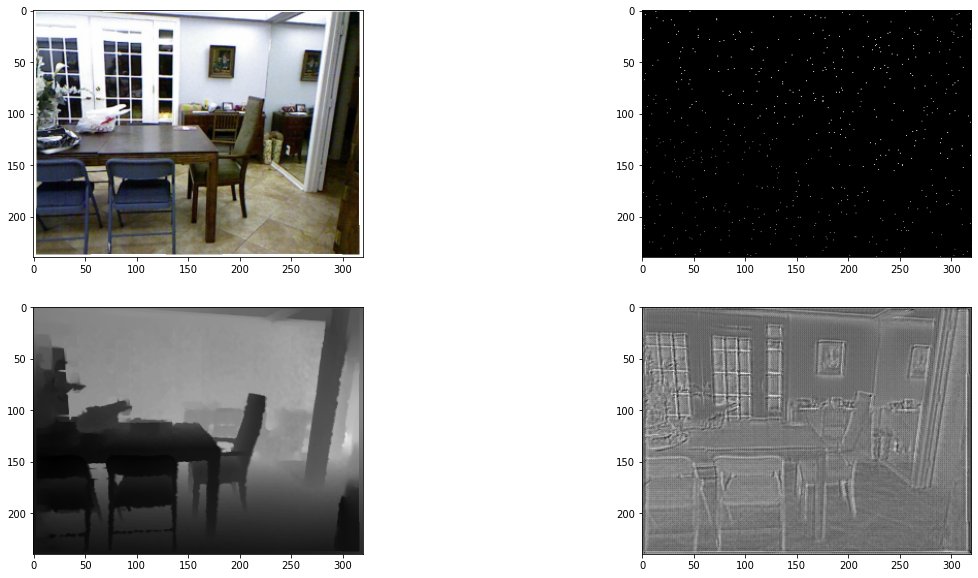

In [30]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,10))

ax1.imshow(rgb.squeeze(0).permute(1,2,0))
ax2.imshow(depth_t.squeeze(0).permute(1,2,0),cmap="gray")
ax3.imshow(depth.squeeze(0).permute(1,2,0),cmap="gray")
ax4.imshow(out.detach().squeeze(0),cmap="gray")